## Calculate EOS curve

### Obtain equilibrium lattice constant *a* and cohesive energy

1. create a series of FCC lattice with different *a*
2. use EAM potential to calculate the cold energy
3. plot results

[referance value](https://sites.google.com/site/eampotentials/Al)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdapy as mp
from mdapy.plot.pltset import pltset, cm2inch
mp.init('cpu')

[Taichi] version 1.2.0, llvm 10.0.0, commit f189fd79, win, python 3.8.15
[Taichi] Starting on arch=x64


In [2]:
def get_enegy_lattice(potential, pos, box):
    
    neigh = mp.Neighbor(pos, box, potential.rc, max_neigh=150) # build neighbor list
    neigh.compute()
    Cal = mp.Calculator(
            potential,
            ["Al"],
            np.ones(pos.shape[0], dtype=np.int32),
            neigh.verlet_list,
            neigh.distance_list,
            neigh.neighbor_number,
            pos,
            [1, 1, 1],
            box,
        ) # calculate the energy
    Cal.compute()
    return Cal.energy.mean()

In [3]:
eos = []
lattice_constant = 4.05
x, y, z = 3, 3, 3
FCC = mp.LatticeMaker(lattice_constant, "FCC", x, y, z) # build a FCC lattice
FCC.compute()
potential = mp.EAM("Al_DFT.eam.alloy") # read a eam.alloy potential file
for scale in np.arange(0.9, 1.15, 0.01): # loop to get different energies
    energy = get_enegy_lattice(potential, FCC.pos*scale, FCC.box*scale)
    eos.append([scale*lattice_constant, energy])
eos = np.array(eos)

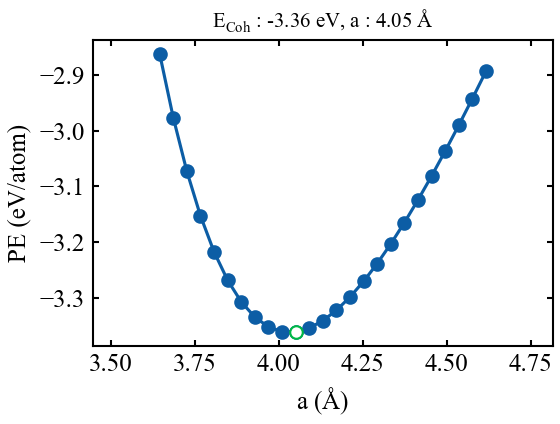

In [4]:
# plot the eos results
pltset()
fig = plt.figure(figsize=(cm2inch(10), cm2inch(7)), dpi=150)
plt.subplots_adjust(bottom=0.18, top=0.92, left=0.2, right=0.98)
plt.plot(eos[:,0], eos[:,1], 'o-')
e_coh = eos[:,1].min()
a_equi = eos[np.argmin(eos[:, 1]), 0]
plt.plot([a_equi], [e_coh], 'o', mfc='white')
plt.title(r'$\mathregular{E_{Coh}}$ : %.2f eV, a : %.2f $\mathregular{\AA}$' % (e_coh, a_equi), fontsize=10)
plt.xlim(eos[0,0]-0.2, eos[-1,0]+0.2)
plt.xlabel("a ($\mathregular{\AA}$)")
plt.ylabel(r"PE (eV/atom)")
ax = plt.gca()
plt.savefig('eos.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()